In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [30]:
covid=pd.read_csv('covid_19_data.csv')

In [31]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [32]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [33]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [34]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [35]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]

# Confirmed Cases

In [36]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [37]:
#Performing GridSearchCV to find the Best Estimator
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))


Root Mean Square Error for Support Vectore Machine:  112998.41836960301


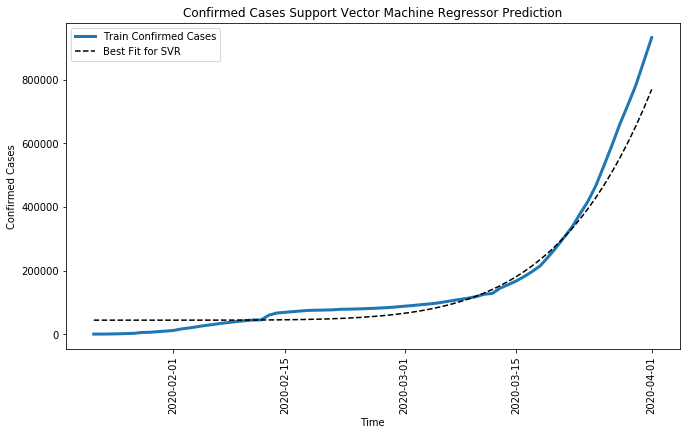

In [39]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [40]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns=["Dates","SVM Prediction"])
model_predictions.head()
#,new_prediction_lr

,Dates,SVM Prediction
0,2020-04-02,834379.416374
1,2020-04-03,903532.788199
2,2020-04-04,977658.904254
3,2020-04-05,1057039.809499
4,2020-04-06,1141969.380303


# Deaths Cases

Root Mean Square Error for Support Vectore Machine Deaths:  683216.6534154452


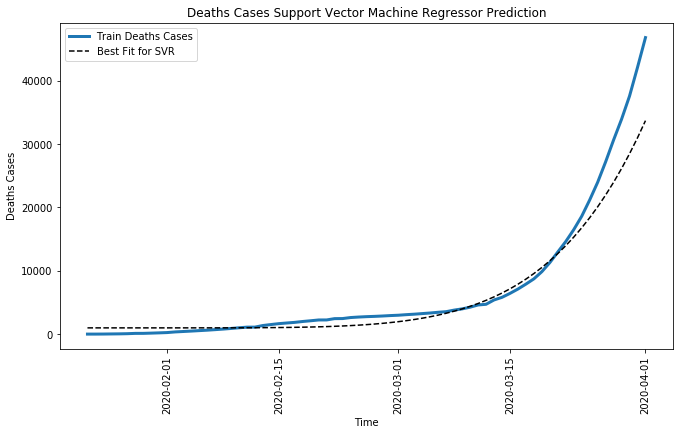

In [41]:
svm_Deaths=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)
svm_Deaths.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))

prediction_valid_svm= svm_Deaths.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine Deaths: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

plt.figure(figsize=(11,6))
prediction_svm=svm_Deaths.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Deaths"],label="Train Deaths Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Deaths Cases')
plt.title("Deaths Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [42]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm_Deaths.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns=["Dates","SVM Prediction Deaths"])
model_predictions.head()

,Dates,SVM Prediction Deaths
0,2020-04-02,36605.296552
1,2020-04-03,39722.158528
2,2020-04-04,43063.150680
3,2020-04-05,46640.985261
4,2020-04-06,50468.907789


# Recovered Cases

Root Mean Square Error for Support Vectore Machine Recovered:  54657.87858202439


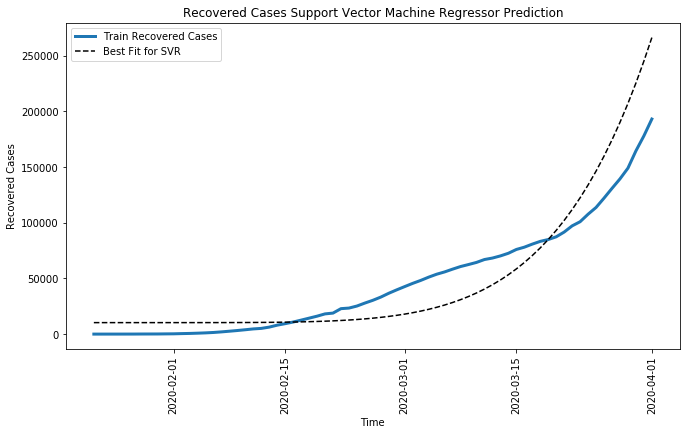

In [43]:
svm_Recovered=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)
svm_Recovered.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))

prediction_valid_svm=svm_Recovered.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Recovered"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine Recovered: ",np.sqrt(mean_squared_error(valid_ml["Recovered"],prediction_valid_svm)))

plt.figure(figsize=(11,6))
prediction_svm=svm_Recovered.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Recovered"],label="Train Recovered Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Recovered Cases')
plt.title("Recovered Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [44]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm_Recovered.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns=["Dates","SVM Prediction Deaths"])
model_predictions.head()

,Dates,SVM Prediction Deaths
0,2020-04-02,289077.001877
1,2020-04-03,313477.938297
2,2020-04-04,339633.519683
3,2020-04-05,367643.266291
4,2020-04-06,397610.873114
